Saving WhatsApp Image 2024-11-14 at 18.58.31.jpeg to WhatsApp Image 2024-11-14 at 18.58.31.jpeg


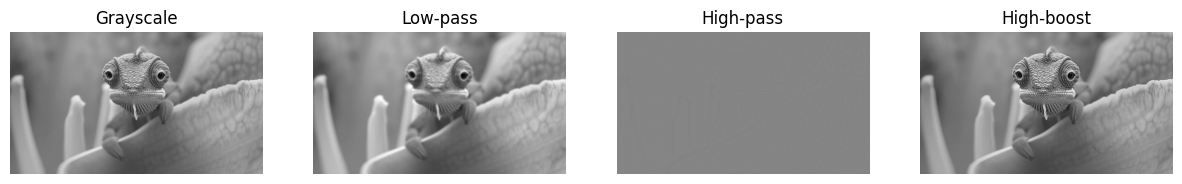

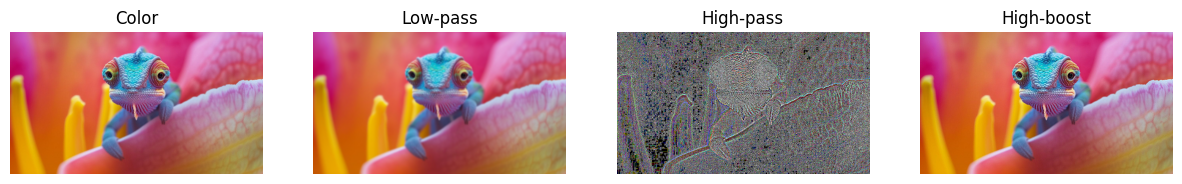

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Fungsi untuk menampilkan citra
def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Unggah file gambar
uploaded = files.upload()

# Membaca gambar
for file_name in uploaded.keys():
    image = Image.open(BytesIO(uploaded[file_name]))
    image_color = np.array(image)  # Konversi ke array numpy
    break  # Hanya memproses satu file yang diunggah

# Pastikan gambar dalam format RGB
if len(image_color.shape) == 2:  # Jika gambar grayscale
    image_color = cv2.cvtColor(image_color, cv2.COLOR_GRAY2RGB)
elif image_color.shape[2] == 4:  # Jika gambar memiliki alpha channel
    image_color = cv2.cvtColor(image_color, cv2.COLOR_RGBA2RGB)

# Konversi ke grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Low-pass filter (Gaussian Blur)
low_pass_gray = cv2.GaussianBlur(image_gray, (15, 15), 0)
low_pass_color = cv2.GaussianBlur(image_color, (15, 15), 0)

# High-pass filter (Laplacian)
high_pass_gray = cv2.Laplacian(image_gray, cv2.CV_64F)
high_pass_color = cv2.Laplacian(image_color, cv2.CV_64F)

# High-boost filter
alpha = 1.5  # Faktor penguatan
high_boost_gray = cv2.addWeighted(image_gray, alpha, low_pass_gray, 1-alpha, 0)
high_boost_color = cv2.addWeighted(image_color, alpha, low_pass_color, 1-alpha, 0)

# Menampilkan hasil
display_images([image_gray, low_pass_gray, high_pass_gray, high_boost_gray],
               ['Grayscale', 'Low-pass', 'High-pass', 'High-boost'], cmap='gray')

display_images([image_color, low_pass_color, high_pass_color, high_boost_color],
               ['Color', 'Low-pass', 'High-pass', 'High-boost'])
